# Hi!

Today we're going to finish the topic of logitic regression, and then talk about the mightiest buzzword of them all - **neural networks**. The topic is very complex and you should treat today only as an introduction you can and should follow up on. We're merely scratching the surface!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import solutions

## But first - Logistic regression (again)


### A quick rewind
$$h_w(x) = \sigma(\sum_{j=0}^k x_j w_j ) = \sigma(xw)$$

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

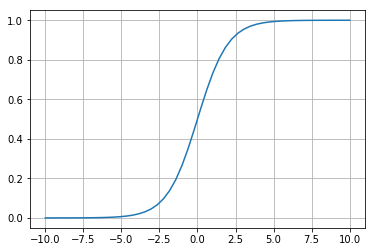

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.show()

Previously we introduced te topic of classification - essentially training our models to decide whether an example 'is' or 'isn't' something. But in real-life, such a binary use case is sometimes *just* not enough.

https://www.youtube.com/watch?v=ACmydtFDTGs

### Multiclass classification

To solve the problem of classifying an object as one of multiple classes, we do a one-vs-all prediction. 
Previously we calculated $h_w(x)$ and applied $sigmoid$ function to it, to calculate the 'probablility' of our example being positive or not. Since $\hat{y} \in [0,1]$ We chose a 'threshold' in that range below which we can treat our example as negative and above which - as positive.

For multiple classes, we must essentially calculate a hypothesis for **every single one** of possible categories. If hypothesis for a given category is high enough, there is a high probability that our object is of that category. In the other case, it means that it belongs to some other category (but we don't know which one - we need other hypotheses for that). 

![alt text](img/multiclass.PNG)
This is called one-versus-all classification. Ultimately we choose the category whose hypothesis has the highest probability.



### Before

Until now, a hypothesis $h_w(x^{(i)})$ for a given object $x^{(i)}$ represented as a vector of features $[x_0^{(i)}, x_1^{(i)}, ... x_k^{(i)}]$ was represented by a scalar:

$$h_w(x) = \sigma(\sum_{j=0}^k w_j x_j) = \sigma(wx)$$

Where w was a vector a weights. 

### Now

If $m$ is the number of possible categories, then for every vector of features we want to perform multiple logistic regressions (for every possible category we might classify it as). 
Essentially, for every vector of $k$ features we now want to obtain a vector of $m$ hypothesis scalars:

$$[x_0^{(i)}, x_1^{(i)}, ... x_k^{(i)}] \xrightarrow{\text{classification}} [h_0^{(i)}, h_1^{(i)}, ... h_m^{(i)}]$$


For every logistic regression we need a separate $k$-dimensional vector (or a $k \times 1$ matrix) of weights. 
If we want to vectorize our computations, we can merge all of the weights vectors into a single, $k \times m$ matrix.

### To sum it up
- $n$ - number of examples in the dataset (objects we want to classify)
- $k$ - number of features every object has
- $m$ - number of possible categories to classify as

$X$ - an $n \times k$ matrix representing the examples
$$
X = \begin{bmatrix}
x_0^{(1)} & x_1^{(1)}  &  & ...  &x_k^{(1)}\\ 
x_0^{(2)} &...  &  &...  & \\ 
... &  &  &...  & \\ 
x_0^{(n)} &  & ... &  & x_k^{(n)}
\end{bmatrix}
$$

$W$ - an $k \times m$ matrix representing weights in logistic regression for every feature in every category

\begin{bmatrix}
w_0^{(1)} & w_0^{(2)}  &  & ...  &w_0^{(m)}\\ 
w_1^{(1)} &...  &  &...  & \\ 
... &  &  &...  & \\ 
w_k^{(1)} &  & ... &  & w_k^{(m)}
\end{bmatrix}


$h_W(X)$ - an $n \times m$ matrix representing hypothesis vectors for every example and category 

$$
h_W(X) = \sigma(XW)
$$

We'll denote j-th hypothesis of i-th example as $$h_w^{(j)}(x^{(i)})$$
Computationally-wise, the only thing that changes is the $m$ dimension of W.


### As for cost function...

$$ L^{(j)}(w) = -\sum_{i=0}^n y^{(i,j)}\log{h_w^{(j)}(x^{(i)})} + (1-y^{(i,j)})\log{(1-h_w(x^{(i)}))}$$

We have a vector of cost values for every category $j$, which is useful in updating weights in gradient descent. If we want to plot the cost function, we can sum or count the mean of all those values.

Gradient descent also works the same way as before.

#### WTF is $y^{(i,j)}$?

We can now look at y as a matrix of one-hot values. If $y^{(i,j)} = 1 $, then example $i$ is of class $j$. 

This also means the rest of values in $y^{(i)}$ are, of course, zeros.



In [3]:
# hint - if you implemented those functions correctly last time, you can just paste your implementations below

def hypotheses(W, X):
    # implement me!


def cost(W, X, Y, eps=0.01):
    # implement me!


def gradient_step(W, X, Y,learning_rate=0.01):
    # implement me!

IndentationError: expected an indented block (<ipython-input-3-ef31fca8001b>, line 7)

In [5]:
hypotheses = solutions._hypotheses
cost = solutions.cost
gradient_step = solutions.gradient_step

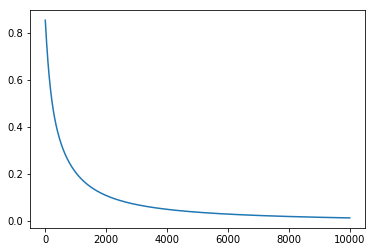

In [6]:
X = np.array([[1, 0, 0.5, 1], [1, 1, 0, 0], [1, 0, 1, 0]])
Y = np.array([[0, 1], [1, 0], [0, 1]])
W = np.random.random((4,2))
costs = []
steps = 10000

for i in range(steps):
    W = gradient_step(W, X, Y)
    costs.append(cost(W, X, Y))

plt.plot(np.arange(steps), costs)
plt.show()

### MNIST - something more ambitious

MNIST is one of the most famous datasets for beginers in Machine Learning.

In [ ]:
from sklearn.datasets import fetch_mldata
mnist_dir = '/tmp/mnist'
mnist = fetch_mldata('MNIST original', data_home=mnist_dir)
print(mnist.data.shape)
img = mnist.data[0]
print(img)

Image of a number can be visualized as array of $784 (= 28*28)$ numbers, or jus a picture. 
For convenience values of pixels are stored not as a 2D array, but as a vector, so in order to be displayed, the vector must be reshaped.

In [ ]:
pixels = img.reshape(28,28) / 255
plt.imshow(pixels, cmap='gray')
plt.show()

We are going to treat every single pixel as a separate feature. In order to do so, let's normalize them. We'll also create one-hot vectors of labels we can fit our model to.

In [ ]:
examples_count = mnist.data.shape[0]
labels = mnist.target.astype(int)
normalized_pixels_nobias = mnist.data / 255
one_hot_labels = np.zeros((examples_count, 10))
one_hot_labels[np.arange(examples_count), labels] = 1

In [ ]:
def display_mnist_elem(index):
    img = mnist.data[rand_no]
    pixels = img.reshape(28,28) / 255
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print('label:', labels[rand_no])
    print('label as a one-hot vector:', one_hot_labels[rand_no])

examples_count = normalized_pixels_nobias.shape[0]
rand_no = np.random.randint(0, examples_count)
display_mnist_elem(rand_no)


Besides normalizing, a bias feature must be added to all examples making the count of features 785.


In [ ]:
normalized_pixels = solutions.add_bias_feature(normalized_pixels_nobias) 

Now let's randomly pick training data from our dataset. In this example we're going to pick only 10000 examples for the sake of training time.

In [ ]:
rand_numbers = np.arange(examples_count)
np.random.shuffle(rand_numbers)

train_count = 10000
train_numbers = rand_numbers[:train_count]
X_train = np.array([normalized_pixels[i] for i in range(examples_count) if i in train_numbers])
Y_train = np.array([one_hot_labels[i] for i in range(examples_count) if i in train_numbers])

X_test = np.array([normalized_pixels[i] for i in range(examples_count) if i not in train_numbers])

Y_test = np.array([mnist.target[i] for i in range(examples_count) if i not in train_numbers])



In this case we train our model on a limited number of examples ( $10000 = \frac{1}{7}$ of the dataset) and for a relatively short number of epochs ($1000$). You are more than welcome to re-run this code with different numbers to see how they will affect the accuracy!

In [ ]:
W = np.random.random((785,10)) # 784 + bias feature
costs = []
steps = 1000

for i in range(steps):
    W = gradient_step(W, X_train, Y_train)
    costs.append(cost(W, X_train, Y_train))

plt.plot(np.arange(steps), costs)
plt.show()

In [ ]:
rand_no = np.random.randint(0, examples_count)
display_mnist_elem(rand_no)
img_pixels = normalized_pixels[rand_no]
predicted_H = hypotheses(W, img_pixels)
predicted_class = np.argmax(predicted_H)

print('predicted hypotheses:', predicted_H)
print('predicted_class:', predicted_class)

Finally, let's test the accuracy on the test data!

In [ ]:
H_test = hypotheses(W, X_test)
predicted_test_labels = np.argmax(H_test, axis=1)
accurate = predicted_test_labels == Y_test
len([a for a in accurate if a]) / len(accurate)

For MNIST it's actually embarassingly bad (best models achieve even 99.9% accuracy), but it's not so bad for one matrix trained on $\frac{1}{7}$ of the dataset!

# We promised you neural networks today, though!

Now that you understand how logistic regression works, you'll see that at a first glance, neural networks have some similarities to them.

## Layers

Neural networks are made up of layers. Every layer transorms the data given to it by previous layer in the form of **activation values** and conveys the output to the next one.

![alt text](img/neural_schema.jpg)

### Some old/new notations

#### activation - values passed as an input to a layer
$a^{(j)}$ - activation values in layer $j$ (a vector)

#### layer matrices
$W^{(j)}$ - matrix of weights mapping activation of layer $j$ into layer $j+1$

## Forward propagation

For a single feature vector (single example) $x$:

Activation of the first (input) layer is simply the (normalized) feature vector (including the bias feature!) of our example:

$$a^{(1)} = x$$

We denote output of the $(j-1)^{th}$ layer as:

$$z^{(j)} = a^{(j-1)}W^{(j-1)}$$ (vector $\times$ matrix, so outputs are vectors).

Activation of $j^{th}$ layer can then be calculated as:

$$a^{(j)} = g(z^{(j)})$$

Where $g$ is an **activation function** - for example sigmoid.

**After** calculating $a^{(j)}$ vector, bias feature must be added to it.

The final output - our hypothesis - is the output of the final layer with activation function applied to it. So if the network has $L$ layers, the equation is:
$$h_W(x) = a^{(L+1)} = g(z^{(L+1)})$$

Though this example was described with only one feature vector $x$, it's analogous when there are more examples and vector becomes a matrix.

### Notice the similarities with logistic regression?

In a way, you could think of it as network learning it's own features. Through adding more layers, we are able to calculate and represent more complex, non-linear models more elegantly.

In [ ]:
def forward_prop(X, w_1, w_2, w_3):
    # assuming X is normalized and contains bias features
    # you could of course extend the function to more layers

In [ ]:
forward_prop = solutions.forward_prop

## But wait! What about cost? Optimization? Learning?

Learning happens through **backpropagation** algorithm which is all about propagation of errors through the network and is a bitch to implement in such a short time. You can read more about it here:

http://cs231n.github.io/optimization-2/

## Enter Keras